<a href="https://colab.research.google.com/github/nobertomaciel/AI-UNIFACS/blob/main/k-means/kmeans_sem_biblioteca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Carregar o dataset Iris
data = load_iris()
X = data.data

In [ ]:
# Definir o número de clusters
k = 3

# Inicializar centroides aleatoriamente
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Definir a quantidade máxima de rodadas
max_iters = 100

In [ ]:
# Função para calcular a distância Euclidiana
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [16]:
# K-Means manual
for _ in range(max_iters):
    # Atribuir cada ponto ao cluster mais próximo
    labels = np.array([np.argmin([euclidean_distance(x, c) for c in centroids]) for x in X])

    # Calcular novos centroides como média dos pontos em cada cluster
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    # Verificar convergência
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

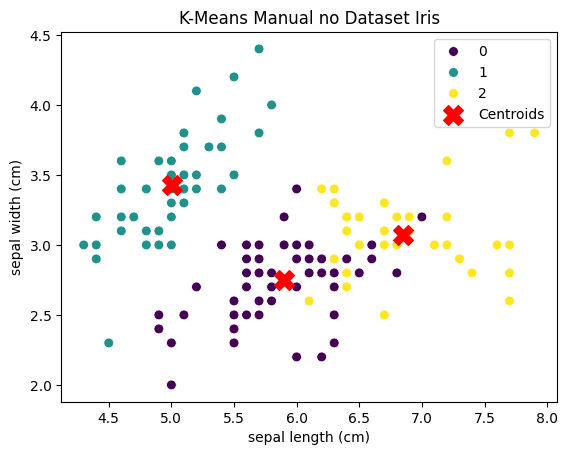

In [17]:
# Criar um DataFrame para visualização
df = pd.DataFrame(X, columns=data.feature_names)
df['Cluster'] = labels

# Plotar os clusters
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()
plt.title("K-Means Manual no Dataset Iris")
plt.show()